# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
# Create spark session
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Forest Cover Type')\
.config('spark-master', 'local')\
.getOrCreate()

# output the object (spark) information
spark

# Read Data

In [2]:
# Read a data file from local disk
directory = '../Desktop'
df_RD = spark.read.format('csv')\
.option('inferSchema', 'true')\
.load(directory+'/covtype.data')

# Change columns name
df_RD = df_RD.toDF("Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type")

df_RD.show(3)

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+-----------------+-----------------+-----------------+-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wildernes

## Explanation:
    - The code read the data into df_RD
    - Each and every df_RD column will be renamed to the correct column name

# User Defined Transform Functionality

In [3]:
from pyspark.sql.types import LongType
from pyspark.sql.functions import udf
def userDefinedFunction(a):
    if a < 6:
        return 0
    elif 6 <= a < 18:
        return 1
    elif 18 <= a < 100:
        return 2
    else:
        return 3
    
userDefinedFunctionUDF = udf(lambda x:userDefinedFunction(x),LongType())
df_UDF =df_RD.withColumn("Grouped_Slope", userDefinedFunctionUDF("Slope"))
df_UDF

df_RD_reordered = df_UDF.select("Elevation", "Aspect", "Slope", "Grouped_Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
                "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
                "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
                "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
                "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
                "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
                "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
                "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
                "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
                "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
                "Soil_Type_40", "Cover_Type")

df_RD_reordered.show(3)

+---------+------+-----+-------------+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+-----------------+-----------------+-----------------+-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+
|Elevation|Aspect|Slope|Grouped_Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Dista

## Explanation:
    - User defined function return an integer if the variable in parameter in some specific range
    - The function will be passed in to the UDF function to make it a UDF function
    - The function will be called in withColumn function to create a new column with the returned value of the function
    - The user defined function created a new column called "Grouped_Slope"

# Data Visualization

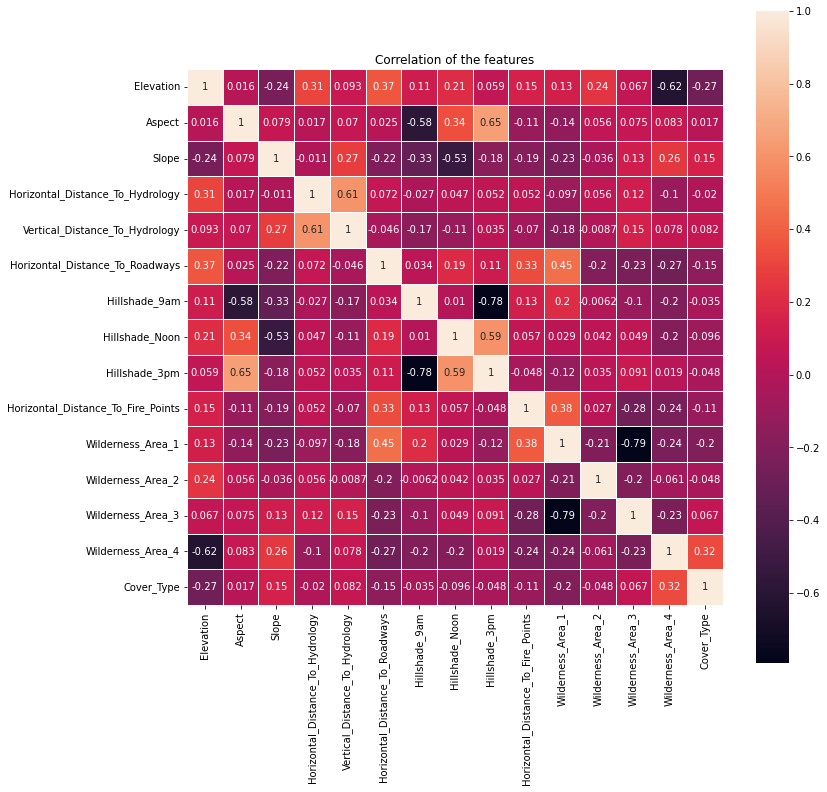

In [4]:
df = df_RD.toPandas()
df = df.drop(df.columns[14:54], axis=1)

mp.figure(figsize=(12, 12))
sb.heatmap(df.corr(), square=True, linewidths=1, annot = True)
mp.title('Correlation of the features')
# displaying heatmap
mp.show()

## Findings:
    - The heatmap shows the correlation between each and every attributes
    - The diagonal value is always 1 as it is the correlation value between the attribute and itself
    - The brighter the color, the higher the correlation is, in a positive value
    - The darker the color, the higher the correlation is, in a negative value

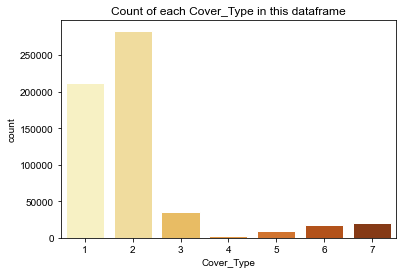

In [5]:
# visualize the count of each 'Cover_Type' in this dataframe
mp.title('Count of each Cover_Type in this dataframe')
sb.set_style('whitegrid')
sb.countplot(x=df['Cover_Type'], palette = 'YlOrBr')

mp.show()

## Findings:
    - Cover_Type 2 has the highest count comparing two others with Cover_Type 1 following as the second highest
    - Cover_Type 4 has the least count among all other Cover_Type

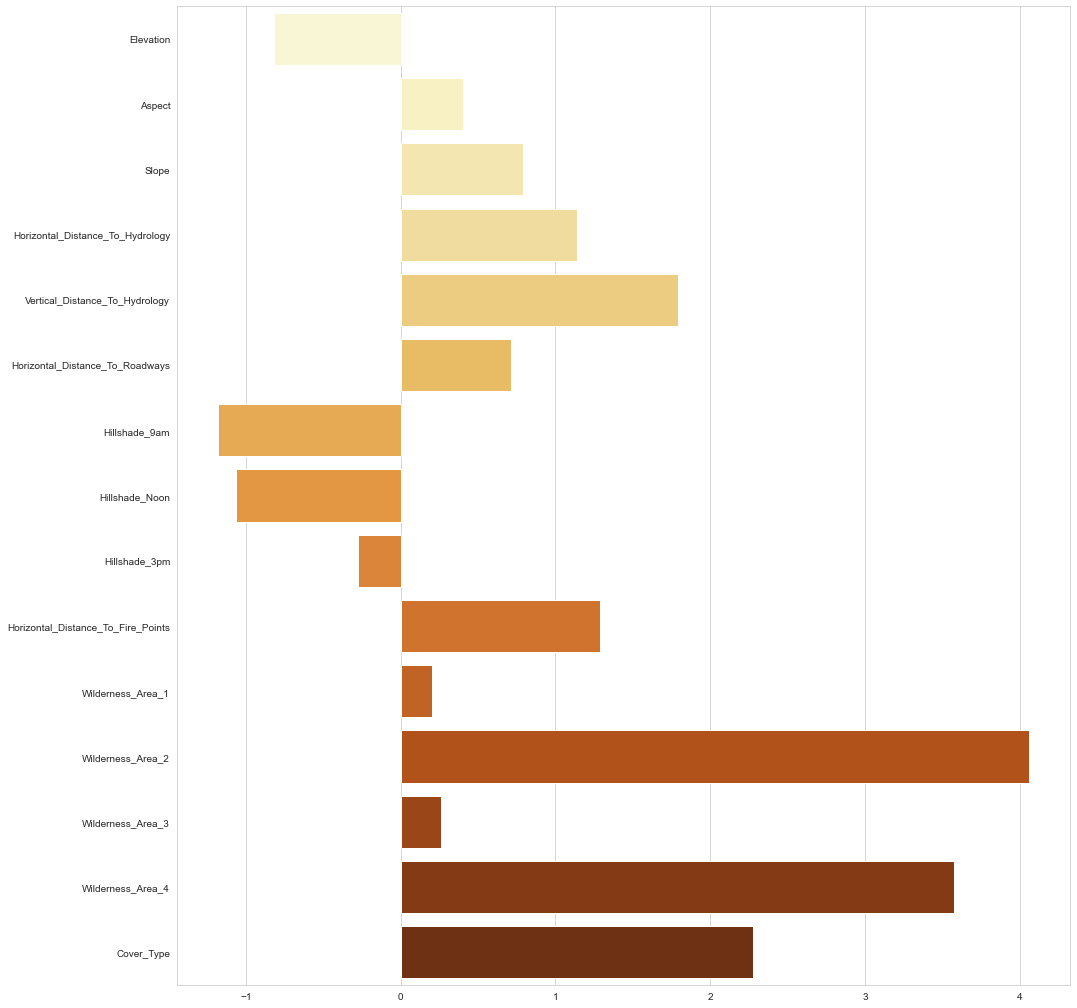

In [6]:
# set up the figure size 
mp.figure(figsize=(16,18))
skewness = df.skew()
# plot out the diagram to have a clear view of the skewness
sb.barplot(x=skewness, y=skewness.index, palette = 'YlOrBr')

# show the plot
mp.show()

## Findings:
    - Most attributes has a positive skewness value
    - Wilderness_Area_2 has the most positive skewness value
    - Elevation and Hillshade attributes has negative skewness value

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

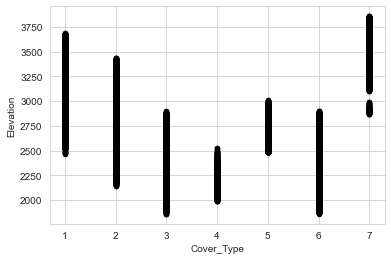

In [7]:
df.plot.scatter(x='Cover_Type', y='Elevation', c='black')

## Findings:
    - Cover_Type 7 has the biggest elevation with the biggest is above 3750
    - Cover_Type 3 has the smallest elevation with the smallest is below 2000

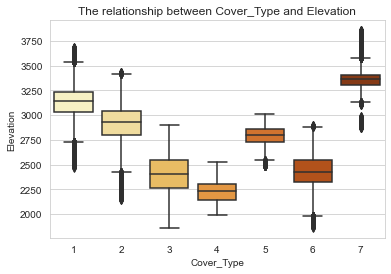

In [8]:
mp.title('The relationship between Cover_Type and Elevation')
sb.boxplot(data=df, x='Cover_Type', y='Elevation', palette='YlOrBr')

mp.show()

## Findings:
    - Cover_Type 7 has the highest median among the other 6 which around 3350 and also the highest upper outlier with 
      the maximum is around 3875
    - Cover_Type 4 has the smallest median
    - Cover_Type 6 has the smallest lower outliers which is approximately under 1000
    - All of the boxes are very different comparing to one another. Thus, it could be a good discriminative feature

In [9]:
from pyspark.ml.feature import VectorAssembler

df_features = df_RD.columns[:-1]
df_features_udf = df_RD_reordered.columns[:-1]
va = VectorAssembler(inputCols=df_features, outputCol="features")
va_udf = VectorAssembler(inputCols=df_features_udf, outputCol="features_with_udf")

## Explanations:
    - Collect the features of dataframe and stored it in df_features
    - Collect the features of dataframe with additional column from UDF and stored it in df_features_udf
    - Create two VectorAssembler, each with different features (with and without the column created by UDF "Grouped_Slope"
      for both va_udf and va respectively) as the inputCols and set the output column containing the vector as "features"
      and "features_with_udf" for both va and va_udf respectively

In [10]:
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.window import Window

va_df = va.transform(df_RD)
va_df_udf = va_udf.transform(df_RD_reordered)

## Explanations:
    - Transform both df_RD (without the "Grouped_Slope" column) and df_RD_reordered (with the "Grouped_Slope" column)
      dataframe with the new column containing the vectors and set it to the variables va_df and va_df_udf

In [11]:
va_df_udf = va_df_udf.withColumnRenamed('Cover_Type', 'Cover_To_Drop')
va_df = va_df.select(['features', 'Cover_Type'])
va_df_udf = va_df_udf.select(['features_with_udf', 'Cover_To_Drop'])

va_df = va_df.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))
va_df_udf = va_df_udf.withColumn('row_index', row_number().over(Window.orderBy(monotonically_increasing_id())))

va_df = va_df.join(va_df_udf, va_df.row_index == va_df_udf.row_index, "inner").drop("Cover_To_Drop")
va_df = va_df.withColumnRenamed('Cover_Type', 'label')

## Explanations:
    - Only the columns "features" and "Cover_Type" ("Cover_To_Drop" for va_df_udf dataframe) are needed for the model 
      training, so both of the columns are selected using select statement for both va_df and va_df_udf
    - A new column called row_index is created for both va_df and va_df_udf, which is used for the join statement
    - A join is performed on the va_df dataframe (without the additional column from the UDF) with the va_df_udf dataframe
      (with the additional column created by the UDF) on the row_index
    - The "Cover_To_Drop" column is dropped and the "Cover_Type" column is renamed to "label" for the va_df dataframe
    - Finally, va_df has three columns, "features", "label" and "features_with_udf"
    - The "features_to_udf" is used for the fine-tuning step, in which we assigned to the parameter featuresCol to
      include ("features_with_udf") or to exclude ("features") the newly created column created by the UDF

In [12]:
train_df = va_df.sampleBy("label", fractions={1: 2/3, 2: 2/3, 3: 2/3, 4: 2/3, 5: 2/3, 6: 2/3, 7: 2/3})
test_df = va_df.subtract(train_df)

## Explanations:
    - Splitting each data in label into 2/3 as the train data set
    - Subtracting the train data set from the data frame to get the rest for test data set

In [13]:
train_df = train_df.drop("row_index")
test_df = test_df.drop("row_index")

## Explanations:
    - Drop the "row_index" column as it's no longer important

In [14]:
train_df.show()

+--------------------+-----+--------------------+
|            features|label|   features_with_udf|
+--------------------+-----+--------------------+
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,4,5,6,...|
|(54,[0,1,2,3,4,5,...|    2|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    2|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,4,5,6,...|
|(54,[0,1,2,3,4,5,...|    2|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    2|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,4,5,6,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,4,5,6,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,3,4,5,...|
|(54,[0,2,3,4,5,6,...|    5|(55,[0,2,4,5,6,7,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,4,5,6,...|
|(54,[0,1,2,3,4,5,...|    2|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,3,4,5,...|
|(54,[0,1,2,3,4,5,...|    5|(55,[0,1,2,3,4,5,...|


## Explanations:
    - The "features_with_udf" is used for the fine-tuning step, in which we define a parameter to use "features" column
      (without the "Grouped_Slope" column) or to use "features_with_udf" column (with the "Grouped_Slope" column)

# Three Classification Algorithms

## 1. Logistic Regression

In [15]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(labelCol = "label", featuresCol = "features")
lr_classifier = lr.fit(train_df)
lr_test_predictions = lr_classifier.transform(test_df)
lr_train_predictions = lr_classifier.transform(train_df)

## Explanations:
    - Import LogisticRegression and MulticlassClassificationEvaluator from the library
    - Create a variable to store the Classification model
    - Fit the train data set to the model
    - Predict the accuracy for both train and test data set

In [16]:
lr_train_accuracy = MulticlassClassificationEvaluator(labelCol = "label", metricName = "accuracy").evaluate(lr_train_predictions)
print('Accuracy of Train Data:', lr_train_accuracy)

Accuracy of Train Data: 0.7241966881296246


In [17]:
lr_test_accuracy = MulticlassClassificationEvaluator(labelCol = "label", metricName = "accuracy").evaluate(lr_test_predictions)
print('Accuracy of Test Data:', lr_test_accuracy)

Accuracy of Test Data: 0.7241297411166988


## Findings:
    - The accuracy of train data set and test data set that has been fitted to the model only has a slight difference
    - The accuracy for the test data set is lower than the train data set

In [18]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

lrparamGrid = (ParamGridBuilder()
            .addGrid(lr.regParam,[0.0, 0.1, 0.3])
            .addGrid(lr.elasticNetParam,[0.0, 0.5, 0.9])
            .addGrid(lr.featuresCol,["features", "features_with_udf"]) # Parameter to use the new feature created by udf or not
            .build())

evaluator_lr = MulticlassClassificationEvaluator(predictionCol = "prediction")

# Create 5-fold CrossValidator
lrcv = CrossValidator(estimator=lr,
                          estimatorParamMaps=lrparamGrid,
                          evaluator=evaluator_lr,
                          numFolds=5)

# Run cross validations
lrcvModel = lrcv.fit(train_df)
# Use test set here so we can measure the accuracy of our model on new data
lrcv_train_predictions = lrcvModel.transform(train_df)
lrcv_test_predictions = lrcvModel.transform(test_df)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy of Train Data After Tuning:', MulticlassClassificationEvaluator(predictionCol = "prediction").evaluate(lrcv_train_predictions))
print('Accuracy of Test Data After Tuning:', MulticlassClassificationEvaluator(predictionCol = "prediction").evaluate(lrcv_test_predictions))

Accuracy of Train Data After Tuning: 0.7140117914010575
Accuracy of Test Data After Tuning: 0.7141492629607296


## Explanation:
    - Import CrossValidator and ParamGridBuilder from the library to do a fine tuning
    - Add in some parameters to check whether the accuracy will go up or not
    - A parameter to use or not use the newly created column by the UDF is added to the paramGrid, to pick whether 
      the "features" column (without the "Grouped_Slope" column) or the "features_with_udf" column (with the 
      "Grouped_Slope" column) is better for the model
    - Passed in the parameter to CrossValidator estimatorParamMaps
    - Define our own evaluator using MulticlassClassificationEvaluator
    - Fit the train data
    - Predict both train and test data and print out the accuracy

## Findings:
    - Both test and train data set accuracy is lower than the original accuracy

## 2. Decision Tree

In [19]:
from pyspark.ml.classification import DecisionTreeClassifier

decitree = DecisionTreeClassifier(labelCol="label", featuresCol = "features")
decitree_classifier = decitree.fit(train_df)
decitree_train_predictions = decitree_classifier.transform(train_df)
decitree_test_predictions = decitree_classifier.transform(test_df)

## Explanations:
    - Import DecisionTreeClassifier from the libary which then will be passed in to decitree variable
    - Fit the train data set into the model
    - Do a prediction for both train and test data set

In [20]:
decitree_train_accuracy = MulticlassClassificationEvaluator(labelCol = "label", metricName = "accuracy").evaluate(decitree_train_predictions)
print('Accuracy of Train Data:', decitree_train_accuracy)

Accuracy of Train Data: 0.7021485333071716


In [21]:
decitree_test_accuracy = MulticlassClassificationEvaluator(labelCol = "label", metricName = "accuracy").evaluate(decitree_test_predictions)
print('Accuracy of Test Data:', decitree_test_accuracy)

Accuracy of Test Data: 0.700910790074247


## Findings:
    - Accuracy for test data set is slightly lower than train data set
    - The difference is approximately 0.1%

In [22]:
dtparamGrid = (ParamGridBuilder()
            .addGrid(decitree.maxDepth, [2, 5, 10, 15])
            .addGrid(decitree.maxBins, [10, 20, 40, 60])
            .addGrid(lr.featuresCol,["features", "features_with_udf"]) # Parameter to use the new feature created by udf or not
            .build())

# Create 5-fold CrossValidator
dtcv = CrossValidator(estimator = decitree,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction"),
                      numFolds = 5)

# Run cross validations
dtcvModel = dtcv.fit(train_df)
# Use test set here so we can measure the accuracy of our model on new data
dtpredictions_train = dtcvModel.transform(train_df)
dtpredictions_test = dtcvModel.transform(test_df)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy of Train Data After Tuning:', MulticlassClassificationEvaluator(predictionCol = "prediction").evaluate(dtpredictions_train))
print('Accuracy of Test Data After Tuning:', MulticlassClassificationEvaluator(predictionCol = "prediction").evaluate(dtpredictions_test))

Accuracy of Train Data After Tuning: 0.8652099981770429
Accuracy of Test Data After Tuning: 0.8466530431757896


## Explanations:
    - Create a variable with important parameter for the decision tree
    - A parameter to use or not use the newly created column by the UDF is added to the paramGrid, to pick whether 
      the "features" column (without the "Grouped_Slope" column) or the "features_with_udf" column (with the 
      "Grouped_Slope" column) is better for the model
    - Passed in the parameter variable into the CrossValidator as well as the MulticlassClassificationEvaluator to be passed 
      into evaluator
    - Fit the training data set to the tuned model
    - Predict and print out the accuracy for both data set
    
## Findings:
    - The accuracy for both train data and test data are higher than the original accuracy
    - The difference between the original and the tuned model accuracy is around 14% for the test data set

## 3. Random Forest

In [23]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
rf_classifier = rf.fit(train_df)
rf_train_predictions = rf_classifier.transform(train_df)
rf_test_predictions = rf_classifier.transform(test_df)

## Explanations:
    - Import RandomForestClassifier from the library
    - Passed the model into a variable called rf
    - Fit the train data set into the model
    - Do a prediction for both testing and training data set

In [24]:
rf_train_accuracy = MulticlassClassificationEvaluator(labelCol = "label", metricName = "accuracy").evaluate(rf_train_predictions)
print('Accuracy of Train Data:', rf_train_accuracy)

Accuracy of Train Data: 0.6796795530472409


In [25]:
rf_test_accuracy = MulticlassClassificationEvaluator(labelCol = "label", metricName = "accuracy").evaluate(rf_test_predictions)
print('Accuracy of Test Data:', rf_test_accuracy)

Accuracy of Test Data: 0.679344065923853


## Findings:
    - The accuracy difference for both data set is very small, approximately 0.0003%
    - The train data set has a better accuracy rate

In [26]:
rfparamGrid = (ParamGridBuilder()
            .addGrid(rf.maxDepth, [2, 5, 10])
            .addGrid(rf.maxBins, [10, 20, 40])
            .addGrid(rf.numTrees, [5, 10, 20])
            .addGrid(lr.featuresCol,["features", "features_with_udf"]) # Parameter to use the new feature created by udf or not
            .build())
               

# Create 5-fold CrossValidator
rfcv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction"),
                      numFolds = 5)

# Run cross validations
rfcvModel = rfcv.fit(train_df)

# Use test set here so we can measure the accuracy of our model on new data
rfpredictions_train = rfcvModel.transform(train_df)
rfpredictions_test = rfcvModel.transform(test_df)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('Accuracy of Train Data After Tuning:', MulticlassClassificationEvaluator(predictionCol = "prediction").evaluate(rfpredictions_train))
print('Accuracy of Test Data After Tuning:', MulticlassClassificationEvaluator(predictionCol = "prediction").evaluate(rfpredictions_test))

Accuracy of Train Data After Tuning: 0.7199669105248064
Accuracy of Test Data After Tuning: 0.7185526748310108


## Explanations:
    - Create a variable with some parameters of the random forest
    - A parameter to use or not use the newly created column by the UDF is added to the paramGrid, to pick whether 
      the "features" column (without the "Grouped_Slope" column) or the "features_with_udf" column (with the 
      "Grouped_Slope" column) is better for the model
    - Passed in the parameter into CrossValidator estimatorParamMaps and MulticlassClassificationEvaluator into evaluator
    - Fit the train into the tuned model
    - Predict and calculate the accuracy for both testing and training data set

## Findings:
    - The accuracy of the train data set after tuning is higher than the test data set
    - Both data set experience a rise of 4% in the accuracy